In [1]:
from keras_preprocessing.image import ImageDataGenerator

image_size = 128
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    subset="training",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode="categorical"
)

val = datagen.flow_from_directory(
    "Tomato_Dataset\\train",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    subset="validation",
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test = test_datagen.flow_from_directory(
    "Tomato_Dataset\\val",
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [2]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Input
from keras.models import Sequential
import tensorflow as tf


model = Sequential([
    Conv2D(64,7,activation="relu",padding="same",input_shape=[image_size,image_size,3]),
    BatchNormalization(),
    MaxPooling2D(2),
    Conv2D(128,3,activation="relu",padding="same"),
    BatchNormalization(),
    Conv2D(128,3,activation="relu",padding="same"),
    BatchNormalization(),
    MaxPooling2D(2),
    Conv2D(256,3,activation="relu",padding="same"),
    BatchNormalization(),
    Conv2D(256,3,activation="relu",padding="same"),
    BatchNormalization(),
    MaxPooling2D(2),
    Flatten(),
    Dense(128,activation="relu"),
    BatchNormalization(),
    Dropout(.5),
    Dense(64,activation="relu"),
    BatchNormalization(),
    Dropout(.5),
    Dense(10,activation="softmax")
])


# model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3)))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.6))

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.6))

# model.add(Flatten())
# model.add(Dense(1024,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(10,activation="softmax"))

# model = Sequential()

# #1. KATMAN
# model.add(Conv2D(64, 3,activation="relu", data_format="channels_last", kernel_initializer="he_normal", input_shape=(image_size,image_size,3)))
# model.add(BatchNormalization())

# #2. KATMAN

# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

# ### 3. KATMAN
# model.add(Conv2D(128, 3,activation="relu"))
# model.add(BatchNormalization())


# ### 4. KATMAN
# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())

# ### 5. KATMAN
# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

# ### TAM BAĞLANTI KATMANI
# model.add(Flatten())
# model.add(Dense(1024,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.6))#%60 unutma işlemi(nöron silme-dropout)

# ### Çıkış katmanı

# model.add(Dense(10,activation="softmax")) #Sınıflama işlemi (7 duygu sınıfı var)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
#model özetini görselleştirelim

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      9472      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      9472      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0

In [3]:
# model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
history50 = model.fit_generator(
    train,
    epochs=50,
    verbose=1,
    validation_data=val)

Epoch 1/50


<ipython-input-3-6250998a5eb5>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history50 = model.fit_generator(


2000/2000 [==============================] - 228s 112ms/step - loss: 2.5304 - accuracy: 0.1634 - val_loss: 1.8338 - val_accuracy: 0.3625
Epoch 2/50
2000/2000 [==============================] - 215s 108ms/step - loss: 2.1693 - accuracy: 0.2084 - val_loss: 1.8221 - val_accuracy: 0.3870
Epoch 3/50
2000/2000 [==============================] - 227s 114ms/step - loss: 1.9353 - accuracy: 0.3105 - val_loss: 1.5835 - val_accuracy: 0.4520
Epoch 4/50
2000/2000 [==============================] - 223s 112ms/step - loss: 2.0066 - accuracy: 0.2766 - val_loss: 1.7521 - val_accuracy: 0.3655
Epoch 5/50
2000/2000 [==============================] - 236s 118ms/step - loss: 1.9324 - accuracy: 0.2973 - val_loss: 1.4895 - val_accuracy: 0.4930
Epoch 6/50
2000/2000 [==============================] - 236s 118ms/step - loss: 1.8975 - accuracy: 0.3142 - val_loss: 1.6487 - val_accuracy: 0.4170
Epoch 7/50
2000/2000 [==============================] - 232s 116ms/step - loss: 1.8062 - accuracy: 0.3570 - val_loss: 1.327

In [4]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-4-41aa956417fc>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test)


1000

In [5]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

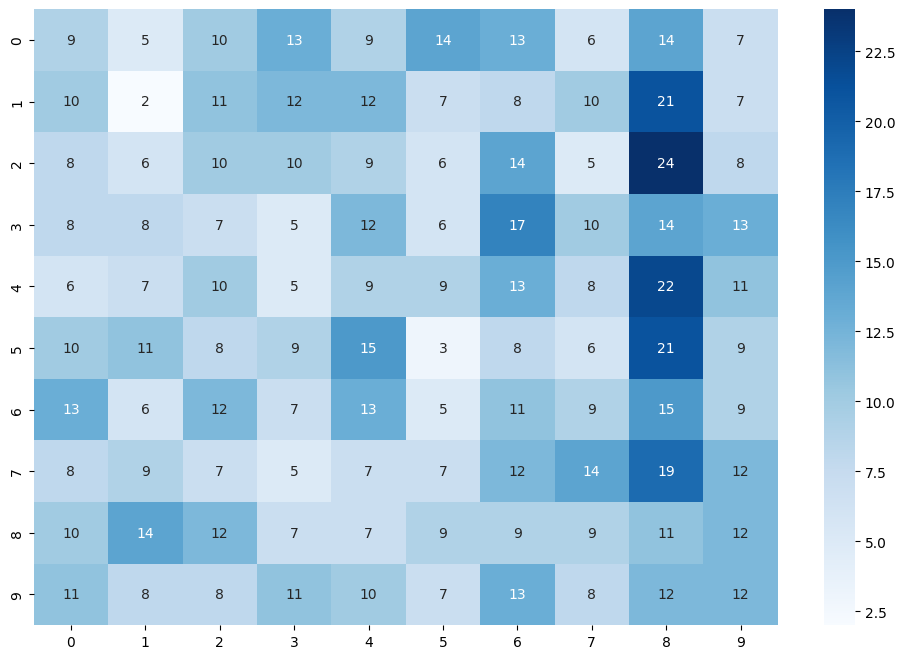

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [7]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.0968    0.0900    0.0933       100
                        Tomato___Early_blight     0.0263    0.0200    0.0227       100
                         Tomato___Late_blight     0.1053    0.1000    0.1026       100
                           Tomato___Leaf_Mold     0.0595    0.0500    0.0543       100
                  Tomato___Septoria_leaf_spot     0.0874    0.0900    0.0887       100
Tomato___Spider_mites Two-spotted_spider_mite     0.0411    0.0300    0.0347       100
                         Tomato___Target_Spot     0.0932    0.1100    0.1009       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     0.1647    0.1400    0.1514       100
                 Tomato___Tomato_mosaic_virus     0.0636    0.1100    0.0806       100
                             Tomato___healthy     0.1200    0.1200    0.1200      

In [8]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,Input
from keras.models import Sequential
import tensorflow as tf


model = Sequential([
    Conv2D(64,(3,3),activation="relu",padding="same",input_shape=[image_size,image_size,3]),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    BatchNormalization(),
    Conv2D(128,(3,3),activation="relu",padding="same"),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Conv2D(256,(3,3),activation="relu",padding="same"),
    BatchNormalization(),
    Conv2D(256,(3,3),activation="relu",padding="same"),
    BatchNormalization(),
    MaxPooling2D(3,3),
    Flatten(),
    Dense(128,activation="relu"),
    BatchNormalization(),
    Dropout(.5),
    Dense(64,activation="relu"),
    BatchNormalization(),
    Dropout(.5),
    Dense(10,activation="softmax")
])


# model.add(Conv2D(128,(3,3),activation="relu",input_shape=(image_size,image_size,3)))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.6))

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())

# model.add(Conv2D(128, (3, 3),activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(3,3))
# model.add(Dropout(0.6))

# model.add(Flatten())
# model.add(Dense(1024,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(10,activation="softmax"))

# model = Sequential()

# #1. KATMAN
# model.add(Conv2D(64, 3,activation="relu", data_format="channels_last", kernel_initializer="he_normal", input_shape=(image_size,image_size,3)))
# model.add(BatchNormalization())

# #2. KATMAN

# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

# ### 3. KATMAN
# model.add(Conv2D(128, 3,activation="relu"))
# model.add(BatchNormalization())


# ### 4. KATMAN
# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())

# ### 5. KATMAN
# model.add(Conv2D(64, 3,activation="relu"))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2))
# model.add(Dropout(0.6)) #%60 unutma işlemi(nöron silme-dropout)

# ### TAM BAĞLANTI KATMANI
# model.add(Flatten())
# model.add(Dense(1024,activation="relu"))
# model.add(BatchNormalization())
# model.add(Dropout(0.6))#%60 unutma işlemi(nöron silme-dropout)

# ### Çıkış katmanı

# model.add(Dense(10,activation="softmax")) #Sınıflama işlemi (7 duygu sınıfı var)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #opmizasyon ve başarım hesaplama metriklerinin belirlenmesi
#model özetini görselleştirelim

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization_7 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 42, 42, 64)       0         
 2D)                                                             
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 128, 128, 64)      1792      
                                                                 
 batch_normalization_7 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                      

In [9]:
# model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["acc"])
history50 = model.fit_generator(
    train,
    epochs=50,
    verbose=1,
    validation_data=val)

<ipython-input-9-6250998a5eb5>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history50 = model.fit_generator(


Epoch 1/50
2000/2000 [==============================] - 116s 56ms/step - loss: 2.4052 - accuracy: 0.2005 - val_loss: 1.9349 - val_accuracy: 0.3205
Epoch 2/50
2000/2000 [==============================] - 110s 55ms/step - loss: 2.0463 - accuracy: 0.2673 - val_loss: 2.1364 - val_accuracy: 0.2370
Epoch 3/50
2000/2000 [==============================] - 109s 55ms/step - loss: 2.0617 - accuracy: 0.2529 - val_loss: 2.1812 - val_accuracy: 0.2105
Epoch 4/50
2000/2000 [==============================] - 109s 55ms/step - loss: 1.9182 - accuracy: 0.3094 - val_loss: 1.4789 - val_accuracy: 0.5105
Epoch 5/50
2000/2000 [==============================] - 109s 55ms/step - loss: 1.7837 - accuracy: 0.3672 - val_loss: 2.4961 - val_accuracy: 0.2320
Epoch 6/50
2000/2000 [==============================] - 109s 55ms/step - loss: 1.7607 - accuracy: 0.3790 - val_loss: 1.3132 - val_accuracy: 0.5680
Epoch 7/50
2000/2000 [==============================] - 110s 55ms/step - loss: 1.6820 - accuracy: 0.4142 - val_loss: 1

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(test)
y_pred = np.argmax(Y_pred,axis=1)
len(y_pred) 

<ipython-input-10-41aa956417fc>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(test)


1000

In [11]:
ytrue=np.array(np.array(test.labels))
ypred=np.array(y_pred)
cm=confusion_matrix(ytrue,ypred)

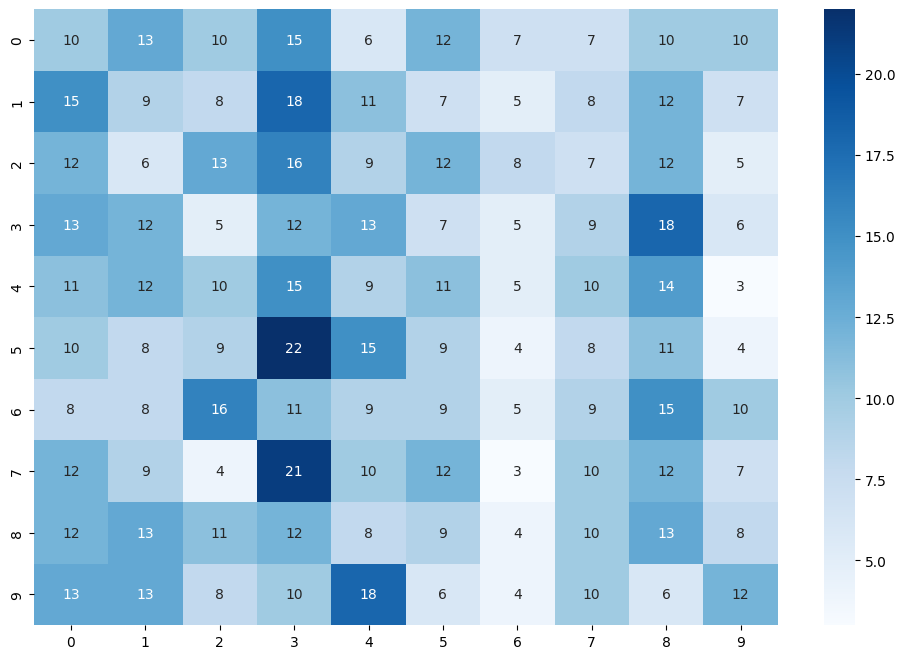

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,cmap="Blues", annot=True)
plt.show()

In [13]:
from sklearn.metrics import classification_report
clr = classification_report(ytrue, ypred, target_names=list(test.class_indices.keys()), digits= 4) # create classification report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot     0.0862    0.1000    0.0926       100
                        Tomato___Early_blight     0.0874    0.0900    0.0887       100
                         Tomato___Late_blight     0.1383    0.1300    0.1340       100
                           Tomato___Leaf_Mold     0.0789    0.1200    0.0952       100
                  Tomato___Septoria_leaf_spot     0.0833    0.0900    0.0865       100
Tomato___Spider_mites Two-spotted_spider_mite     0.0957    0.0900    0.0928       100
                         Tomato___Target_Spot     0.1000    0.0500    0.0667       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus     0.1136    0.1000    0.1064       100
                 Tomato___Tomato_mosaic_virus     0.1057    0.1300    0.1166       100
                             Tomato___healthy     0.1667    0.1200    0.1395      